# import library and file

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# load the CIFAR10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


# Reading data and visualize_CNN

In [ ]:
# Display dataset information
print("Dataset Information:")

# Training set
print("\nTraining Set:")
print(f"Number of Training Images: {X_train.shape[0]}")
print(f"Image Dimensions: {X_train.shape[1]} x {X_train.shape[2]} pixels")
print(f"Number of Color Channels: {X_train.shape[3]} (e.g., 3 for RGB)")
print(f"Number of Training Labels: {y_train.shape[0]}")

# Testing set
print("\nTesting Set:")
print(f"Number of Testing Images: {X_test.shape[0]}")
print(f"Image Dimensions: {X_test.shape[1]} x {X_test.shape[2]} pixels")
print(f"Number of Color Channels: {X_test.shape[3]} (e.g., 3 for RGB)")
print(f"Number of Testing Labels: {y_test.shape[0]}")

Dataset Information:

Training Set:
Number of Training Images: 50000
Image Dimensions: 32 x 32 pixels
Number of Color Channels: 3 (e.g., 3 for RGB)
Number of Training Labels: 50000

Testing Set:
Number of Testing Images: 10000
Image Dimensions: 32 x 32 pixels
Number of Color Channels: 3 (e.g., 3 for RGB)
Number of Testing Labels: 10000


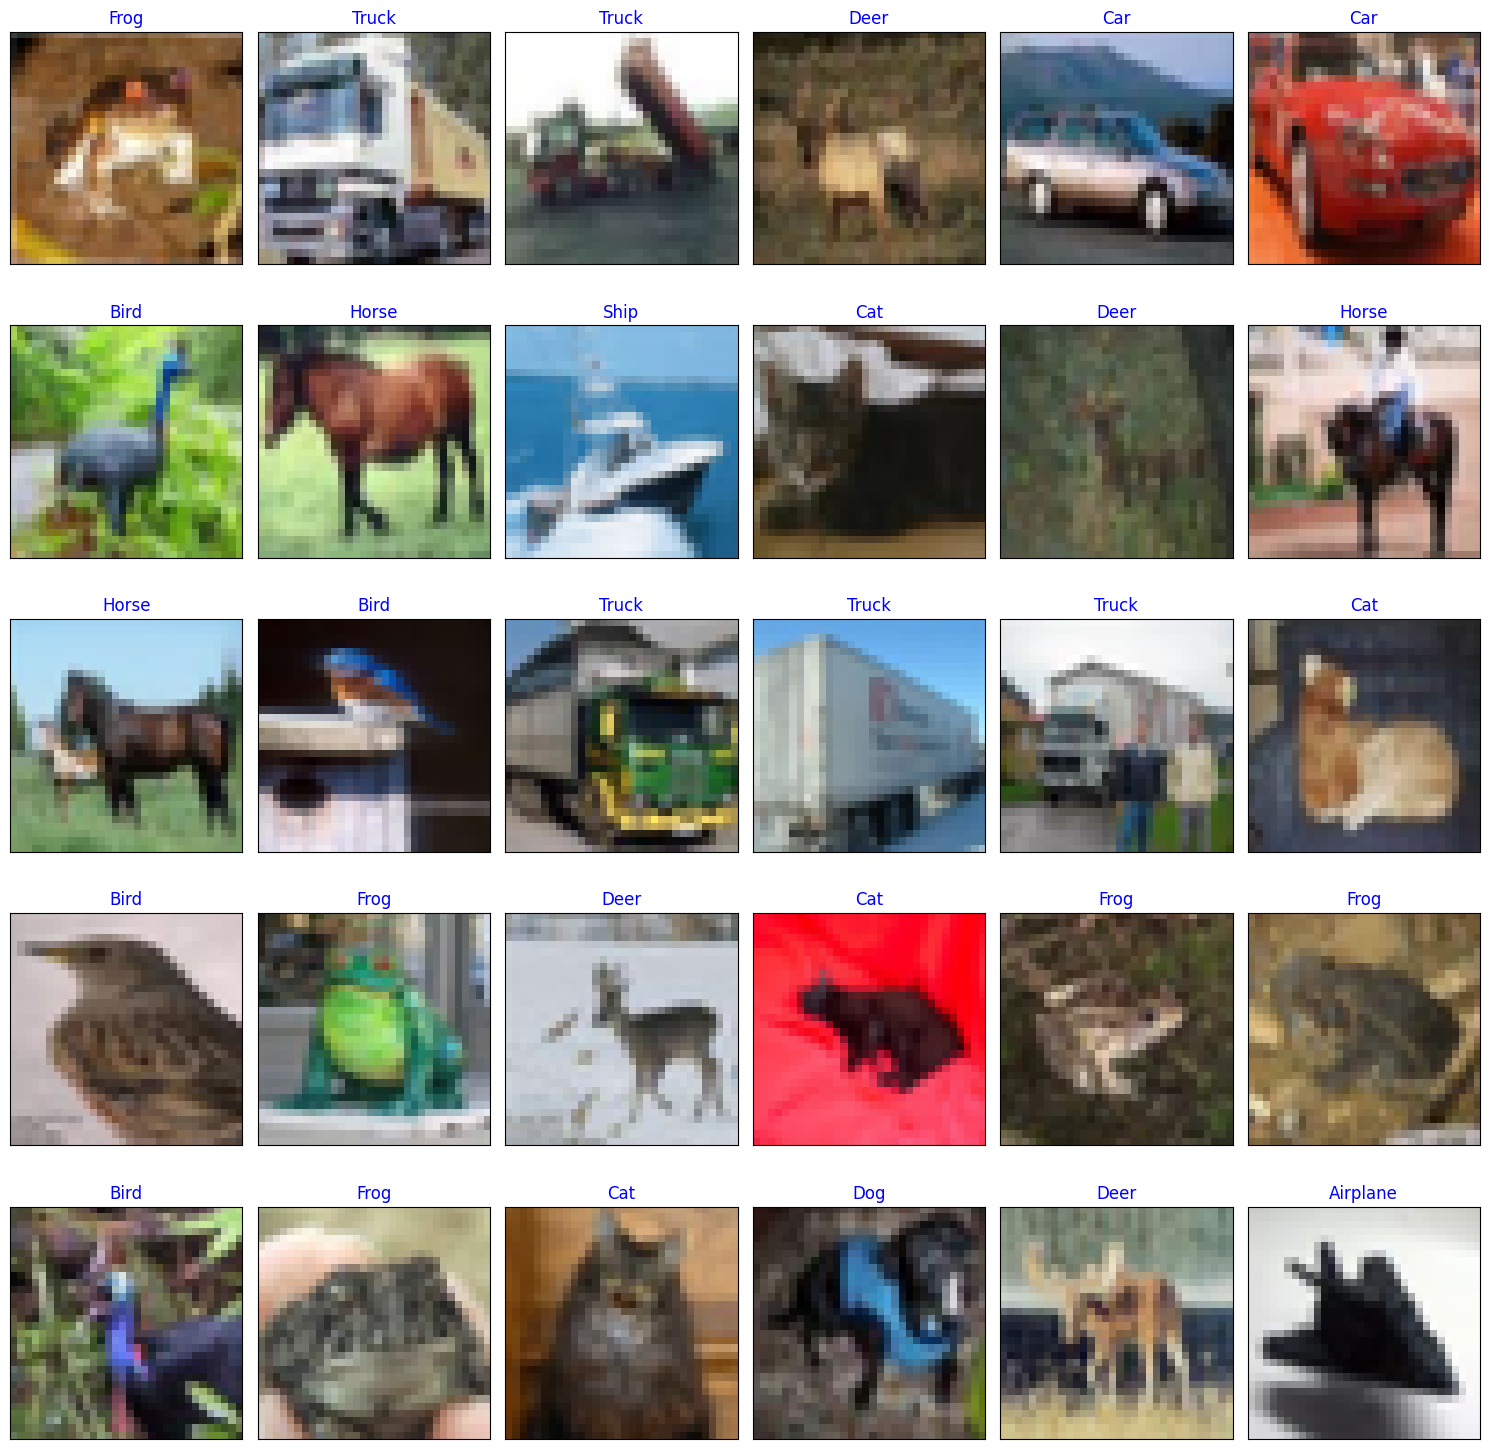

In [ ]:
class_labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(15, 15))

for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Show images with a nice colormap
    plt.imshow(X_train[i], cmap='viridis')

    # Customize the title
    title = class_labels[y_train[i][0]]
    plt.title(title, fontsize=12, color='blue')

plt.tight_layout()
plt.show()

## Normalized data

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

std_train = np.std(X_train)
std_test = np.std(X_test)

mean_train = np.mean(X_train)
mean_test = np.mean(X_test)

X_train = (X_train - mean_train)/(std_train)
X_test = (X_test - mean_test)/(std_test)

## One-Hot Encoding

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (50000, 10)
Shape of y_test: (10000, 10)


## Data Augmentation

data augmentation is a powerful and essential method that significantly enhances machine learning models, particularly in computer vision. Its widespread use enables the development of robust, high-performing models while addressing common challenges related to data scarcity, class imbalance, and overfitting.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=[0.3,1])

In [ ]:
# Create a data generator iterator
batch_size = 64
aug = datagen.flow(X_train, y_train, batch_size=batch_size)

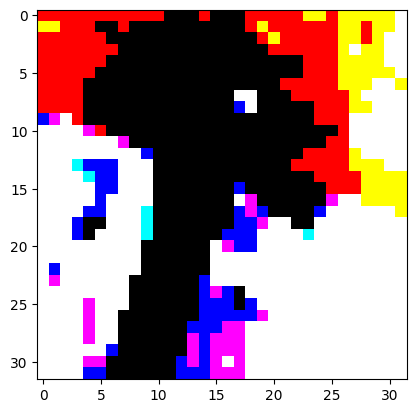

In [ ]:
# Get the first batch of augmented data
batch_0 = aug[0]

# Extract images and labels from the first batch
batch_0_images = batch_0[0]
batch_0_labels = batch_0[1]

# Display one of the augmented images
plt.imshow(batch_0_images[0].astype(np.uint8))

In [ ]:
aug[0][1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Model Architecture

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

### Split data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

### Model 1

In [ ]:
model = Sequential()

# Convolutional Layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())


# Classification Layer
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                      

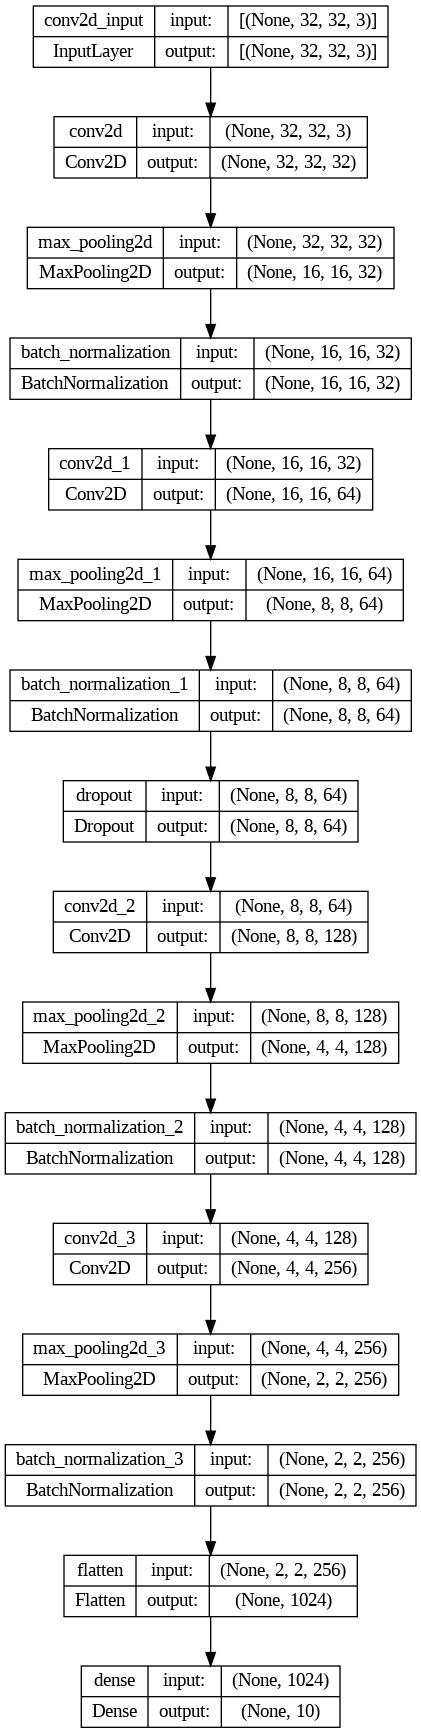

In [ ]:
plot_model(model, 'model1.jpg', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(aug,
          epochs = 50,
          validation_data=(X_val, y_val),
         # callbacks=[reduce_learningrate, model_checkpoint],
          verbose=1,
          batch_size=64)

Epoch 1/50
782/782 [==============================] - 62s 75ms/step - loss: 1.7785 - accuracy: 0.3674 - val_loss: 1.6924 - val_accuracy: 0.4258
Epoch 2/50
782/782 [==============================] - 59s 75ms/step - loss: 1.5085 - accuracy: 0.4626 - val_loss: 1.3534 - val_accuracy: 0.5246
Epoch 3/50
782/782 [==============================] - 57s 73ms/step - loss: 1.3885 - accuracy: 0.5076 - val_loss: 1.5687 - val_accuracy: 0.4926
Epoch 4/50
782/782 [==============================] - 56s 72ms/step - loss: 1.2896 - accuracy: 0.5394 - val_loss: 1.2049 - val_accuracy: 0.5780
Epoch 5/50
782/782 [==============================] - 58s 74ms/step - loss: 1.2259 - accuracy: 0.5650 - val_loss: 1.1902 - val_accuracy: 0.5958
Epoch 6/50
782/782 [==============================] - 57s 73ms/step - loss: 1.1710 - accuracy: 0.5860 - val_loss: 1.1174 - val_accuracy: 0.6252
Epoch 7/50
782/782 [==============================] - 57s 72ms/step - loss: 1.1250 - accuracy: 0.6035 - val_loss: 1.0735 - val_accuracy:

KeyboardInterrupt: ignored

#### Model Evaluation

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('acc trend')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_loss, test_acc)

#### Predict new

In [ ]:
image = cv2.imread('dena.jpg', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image = cv2.imread('dena.jpg', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image = cv2.resize(image, (32,32))

image = image / 255.0

image = image.reshape((1, 32, 32, 3))

In [ ]:
prediction = model.predict(image)

In [ ]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_labels[predicted_class])

# Reading data and visualize_AutoEncoder

In [ ]:
# create saved_images folder
imgs_dir = 'saved_images'
save_dir = os.path.join(os.getcwd(), imgs_dir)
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)

In [ ]:
def rgb2gray(rgb):
    # The luminance formula: Y = 0.299*R + 0.587*G + 0.114*B
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [ ]:
# Load the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()


# Get image dimensions and number of channels
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
channels = x_train.shape[3]

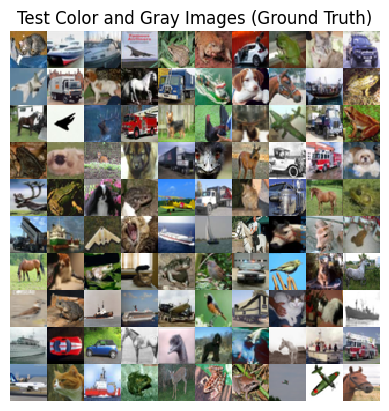

In [ ]:
# Select and reshape the first 100 images
imgs = x_test[:100].reshape(10, 10, img_rows, img_cols, channels)

# Create a combined image grid
combined_image = np.vstack([np.hstack(row) for row in imgs])

# Plot the combined image
plt.figure()
plt.imshow(combined_image, interpolation='none')
plt.axis('off')
plt.title('Test Color and Gray Images (Ground Truth)')
plt.savefig(f'{imgs_dir}/test_color.png')
plt.show()

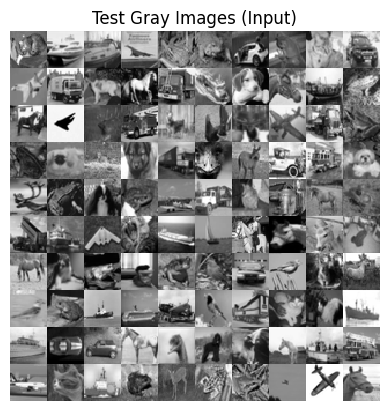

In [ ]:
# Convert color train and test images to grayscale
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

# Select and reshape the first 100 grayscale test images
imgs = x_test_gray[:100].reshape(10, 10, img_rows, img_cols)

# Create a combined image grid
combined_image = np.vstack([np.hstack(row) for row in imgs])

# Plot the combined grayscale image
plt.figure()
plt.imshow(combined_image, interpolation='none', cmap='gray')
plt.axis('off')
plt.title('Test Gray Images (Input)')
plt.savefig(f'{imgs_dir}/test_gray.png')
plt.show()

## Normalize and preprocessing

In [ ]:
# normalize output train and test color images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# normalize input train and test grayscale images
x_train_gray = x_train_gray.astype('float32') / 255
x_test_gray = x_test_gray.astype('float32') / 255

# reshape images to row x col x channel for CNN output/validation
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

# reshape images to row x col x channel for CNN input
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], img_rows, img_cols, 1)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], img_rows, img_cols, 1)

## Build model 1

### Encoder

In [ ]:
# network parameters
input_shape = (img_rows, img_cols, 1)
batch_size = 32
kernel_size = 3
latent_dim = 256
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [64, 128, 256]

# build the autoencoder model
# first build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# stack of Conv2D(64)-Conv2D(128)-Conv2D(256)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

# shape info needed to build decoder model so we don't do hand computation
# the input to the decoder's first Conv2DTranspose will have this shape
# shape is (4, 4, 256) which is processed by the decoder back to (32, 32, 3)
shape = K.int_shape(x)

# generate a latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        640       
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 latent_vector (Dense)       (None, 256)               1048832   
                                                                 
Total params: 1418496 (5.41 MB)
Trainable params: 1418496 (

### Decoder

In [ ]:
# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# stack of Conv2DTranspose(256)-Conv2DTranspose(128)-Conv2DTranspose(64)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

outputs = Conv2DTranspose(filters=channels,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 256)]             0         
                                                                 
 dense_1 (Dense)             (None, 4096)              1052672   
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 256)         590080    
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       295040    
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 32, 32, 64)        7379

### Autoencoder

autoencoder = encoder + decoder

In [ ]:
# instantiate autoencoder model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()


# prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'colorized_ae_model.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# reduce learning rate by sqrt(0.1) if the loss does not improve in 5 epochs
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               verbose=1,
                               min_lr=0.5e-6)

# save weights for future use (e.g. reload parameters w/o training)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True)


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 1)]       0         
                                                                 
 encoder (Functional)        (None, 256)               1418496   
                                                                 
 decoder (Functional)        (None, 32, 32, 3)         2013315   
                                                                 
Total params: 3431811 (13.09 MB)
Trainable params: 3431811 (13.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam')

# called every epoch
callbacks = [lr_reducer, checkpoint]

# train the autoencoder
history = autoencoder.fit(x_train_gray,
                x_train,
                validation_data=(x_test_gray, x_test),
                epochs=30,
                batch_size=batch_size,
                callbacks=callbacks)

Epoch 1/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.0048
Epoch 1: val_loss improved from inf to 0.00811, saving model to /content/saved_models/colorized_ae_model.001.h5
1563/1563 [==============================] - 20s 11ms/step - loss: 0.0048 - val_loss: 0.0081 - lr: 0.0010
Epoch 2/30
1560/1563 [============================>.] - ETA: 0s - loss: 0.0047
Epoch 2: val_loss improved from 0.00811 to 0.00800, saving model to /content/saved_models/colorized_ae_model.002.h5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0047 - val_loss: 0.0080 - lr: 0.0010
Epoch 3/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.0045
Epoch 3: val_loss did not improve from 0.00800
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0045 - val_loss: 0.0082 - lr: 0.0010
Epoch 4/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 4: val_loss improved from 0.00800 to 0.00789, saving model to /content/saved_models/c

In [ ]:
# predict the autoencoder output from test data
x_decoded = autoencoder.predict(x_test_gray)

313/313 [==============================] - 2s 5ms/step


In [ ]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

In [ ]:
autoencoder.save('autoencoder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Accuracy plots

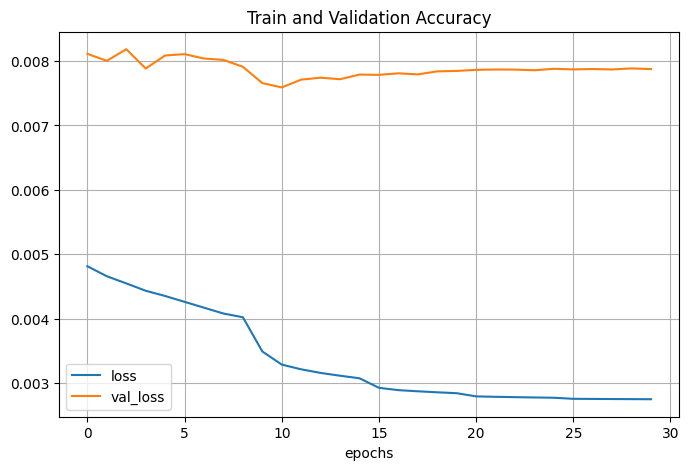

In [ ]:
df = pd.DataFrame(history.history)
df[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epochs")
plt.title('Train and Validation Accuracy')
plt.show()

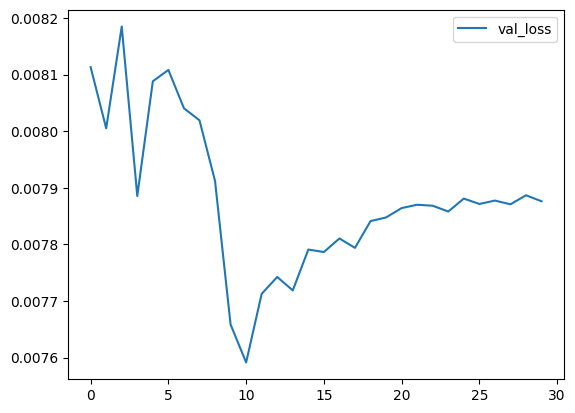

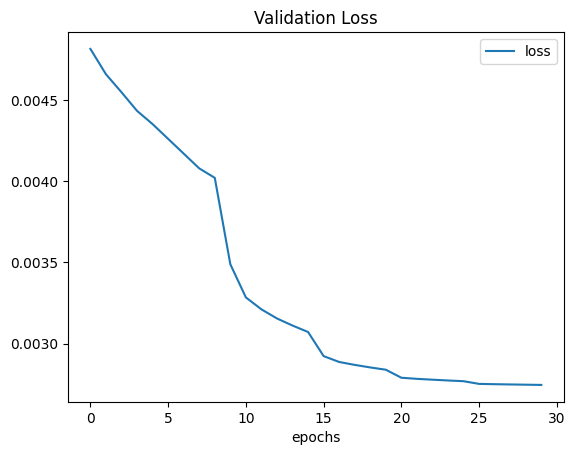

In [ ]:
df[['val_loss']].plot()
df[['loss']].plot()
plt.xlabel("epochs")
plt.title('Validation Loss')
plt.show()

### Display

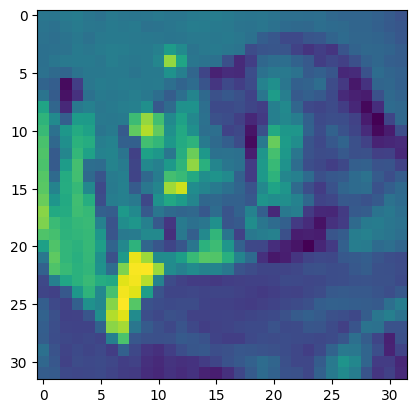

In [ ]:
# Display the first grayscale image from x_test_gray
plt.imshow(array_to_img(x_test_gray[0]))
plt.show()

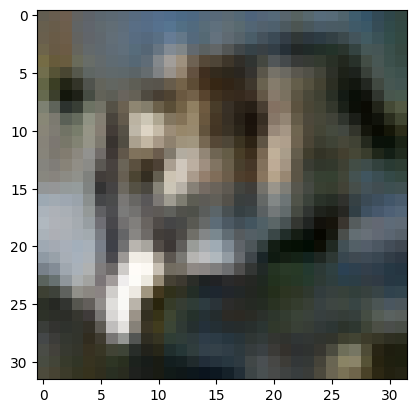

In [ ]:
plt.imshow(array_to_img(x_decoded[0]))
plt.show()

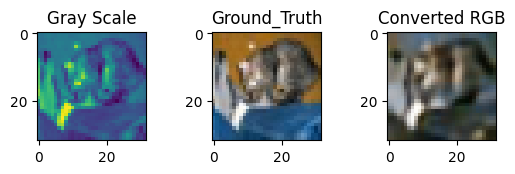

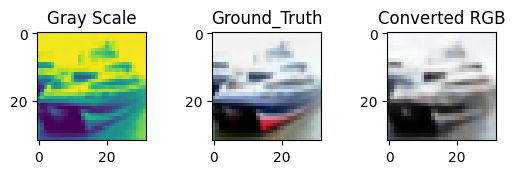

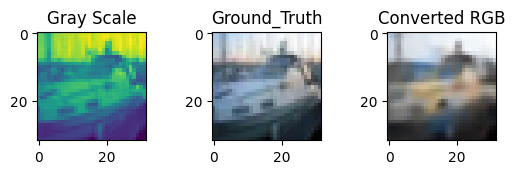

In [ ]:
for i in range(0,3):
    fig = plt.figure()
#   fig.suptitle("RGB      GroundTruth    Converted",size=16)
    ax1 = fig.add_subplot(3,3,1)
    ax1.set_title("Gray Scale")
    ax1.imshow(array_to_img(x_test_gray[i]))

    ax2 = fig.add_subplot(3,3,2)
    ax2.set_title("Ground_Truth")
    ax2.imshow(array_to_img(x_test[i]))

    ax3 = fig.add_subplot(3,3,3)
    ax3.set_title("Converted RGB")
    ax3.imshow(array_to_img(x_decoded[i]))

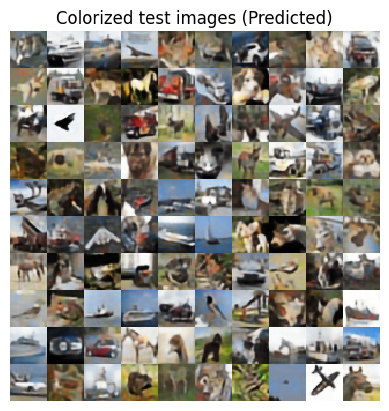

In [ ]:
# display the 1st 100 colorized images
imgs = x_decoded[:100]
imgs = imgs.reshape((10, 10, img_rows, img_cols, channels))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Colorized test images (Predicted)')
plt.imshow(imgs, interpolation='none')
plt.savefig('%s/colorized.png' % imgs_dir)
plt.show()

#### new IMage

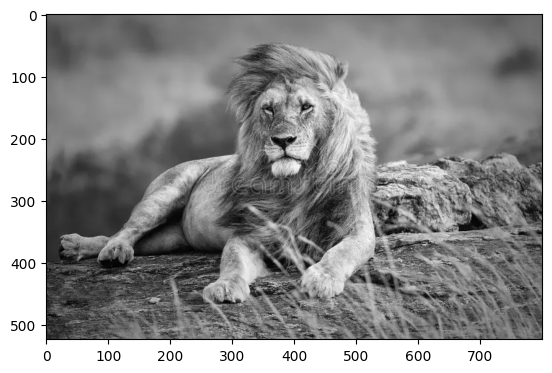

In [ ]:
image = cv2.imread('image.webp', cv2.IMREAD_UNCHANGED)
# Display one of the augmented images
plt.imshow(image)

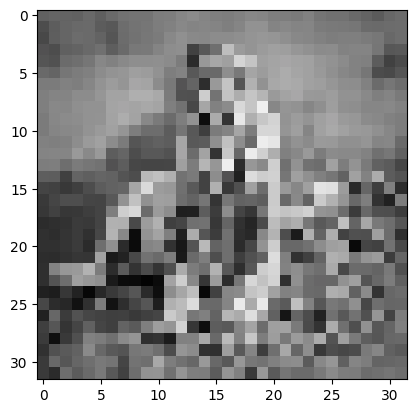

In [ ]:
imageRe = cv2.resize(image, (32,32))
# Display one of the augmented images
plt.imshow(imageRe)

In [ ]:
imageRe.shape

(32, 32, 3)

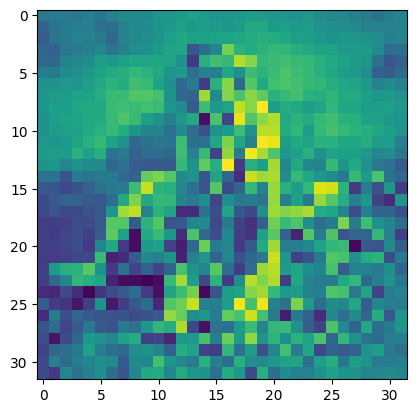

In [ ]:
imageReG = rgb2gray(imageRe)
plt.imshow(imageReG)

In [ ]:
imageRe.shape

(32, 32)

In [ ]:
# normalize output train and test color images
imageReG = imageReG.astype('float32') / 255
# Reshape the grayscale image to row x col x channel (1 for grayscale)
imageReG = imageReG.reshape(1, img_rows, img_cols, 1)

In [ ]:
# Colorize the new grayscale image
colorized_image = autoencoder.predict(imageReG)

1/1 [==============================] - 0s 65ms/step


In [ ]:
colorized_image

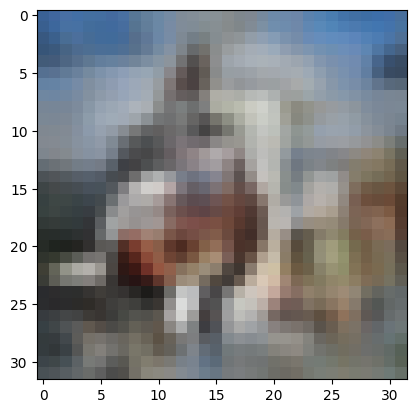

In [ ]:
colorized_image = colorized_image[0]

# Reshape it to (32, 32, 3)
colorized_image = colorized_image.reshape(32, 32, 3)

# Display the colorized image
plt.imshow(colorized_image)
plt.show()

In [ ]:
image.shape

(524, 800, 3)

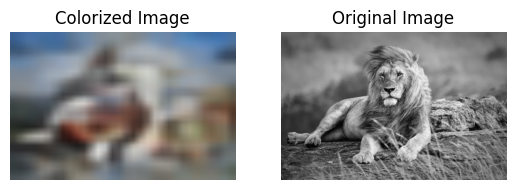

In [ ]:
# Resize the colorized image to its original size
colorized_image = cv2.resize(colorized_image, (image.shape[1],image.shape[0]))

# Create a subplot with two images side by side
plt.subplot(1, 2, 1)
plt.title('Colorized Image')
plt.imshow(colorized_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.show()